<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_6_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,90.559635,271.831100,-104.824781,376.655881
1,0.0,1.0,84.811384,90.263394,48.152488,44.290288,277.517555,470.692589,-193.175034
2,0.0,2.0,85.367006,79.971966,30.234286,234.548557,440.121815,265.362458,174.759358
3,0.0,3.0,77.359299,99.361088,30.715902,80.503627,297.939916,442.970290,-145.030375
4,0.0,4.0,66.172252,77.690898,81.326401,117.953998,353.143549,570.845628,-217.702079
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,220.617270,411.879843,139.048944,272.830900
119996,999.0,116.0,59.821851,70.493625,39.142519,-649.106989,-469.648993,157.277826,-626.926820
119997,999.0,117.0,27.825940,21.812149,86.626142,223.061103,369.325334,167.486919,201.838415
119998,999.0,118.0,98.429329,29.603075,35.081782,179.973499,353.087685,-85.841994,438.929679


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,90.559635,271.831100,-104.824781,376.655881
1,0.0,1.0,84.811384,90.263394,48.152488,44.290288,277.517555,470.692589,-193.175034
2,0.0,2.0,85.367006,79.971966,30.234286,234.548557,440.121815,265.362458,174.759358
3,0.0,3.0,77.359299,99.361088,30.715902,80.503627,297.939916,442.970290,-145.030375
4,0.0,4.0,66.172252,77.690898,81.326401,117.953998,353.143549,570.845628,-217.702079
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,220.617270,411.879843,139.048944,272.830900
119996,999.0,116.0,59.821851,70.493625,39.142519,-649.106989,-469.648993,157.277826,-626.926820
119997,999.0,117.0,27.825940,21.812149,86.626142,223.061103,369.325334,167.486919,201.838415
119998,999.0,118.0,98.429329,29.603075,35.081782,179.973499,353.087685,-85.841994,438.929679


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    97.314689  26.811758  ... -104.824781  376.655881
      1.0    84.811384  90.263394  ...  470.692589 -193.175034
      2.0    85.367006  79.971966  ...  265.362458  174.759358
      3.0    77.359299  99.361088  ...  442.970290 -145.030375
      4.0    66.172252  77.690898  ...  570.845628 -217.702079
...                ...        ...  ...         ...         ...
999.0 115.0  74.209446  68.505229  ...  139.048944  272.830900
      116.0  59.821851  70.493625  ...  157.277826 -626.926820
      117.0  27.825940  21.812149  ...  167.486919  201.838415
      118.0  98.429329  29.603075  ...  -85.841994  438.929679
      119.0  48.220330  29.617922  ...  -76.223936  214.734027

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    97.314689  26.811758  ... -104.824781  376.655881
      1.0    84.811384  90.263394  ...  470.692589 -193.175034
      2.0    85.367006  79.971966  ...  265.362458  174.759358
      3.0    77.359299  99.361088  ...  442.970290 -145.030375
      4.0    66.172252  77.690898  ...  570.845628 -217.702079
...                ...        ...  ...         ...         ...
999.0 115.0  74.209446  68.505229  ...  139.048944  272.830900
      116.0  59.821851  70.493625  ...  157.277826 -626.926820
      117.0  27.825940  21.812149  ...  167.486919  201.838415
      118.0  98.429329  29.603075  ...  -85.841994  438.929679
      119.0  48.220330  29.617922  ...  -76.223936  214.734027

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,90.559635,271.831100,-104.824781,376.655881
1,0.0,1.0,84.811384,90.263394,48.152488,44.290288,277.517555,470.692589,-193.175034
2,0.0,2.0,85.367006,79.971966,30.234286,234.548557,440.121815,265.362458,174.759358
3,0.0,3.0,77.359299,99.361088,30.715902,80.503627,297.939916,442.970290,-145.030375
4,0.0,4.0,66.172252,77.690898,81.326401,117.953998,353.143549,570.845628,-217.702079
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,220.617270,411.879843,139.048944,272.830900
119996,999.0,116.0,59.821851,70.493625,39.142519,-649.106989,-469.648993,157.277826,-626.926820
119997,999.0,117.0,27.825940,21.812149,86.626142,223.061103,369.325334,167.486919,201.838415
119998,999.0,118.0,98.429329,29.603075,35.081782,179.973499,353.087685,-85.841994,438.929679


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    97.314689  26.811758  ... -104.824781  376.655881
      1.0    84.811384  90.263394  ...  470.692589 -193.175034
      2.0    85.367006  79.971966  ...  265.362458  174.759358
      3.0    77.359299  99.361088  ...  442.970290 -145.030375
      4.0    66.172252  77.690898  ...  570.845628 -217.702079
...                ...        ...  ...         ...         ...
999.0 115.0  74.209446  68.505229  ...  139.048944  272.830900
      116.0  59.821851  70.493625  ...  157.277826 -626.926820
      117.0  27.825940  21.812149  ...  167.486919  201.838415
      118.0  98.429329  29.603075  ...  -85.841994  438.929679
      119.0  48.220330  29.617922  ...  -76.223936  214.734027

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

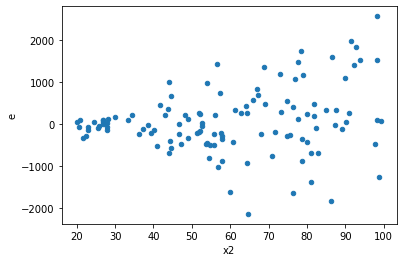

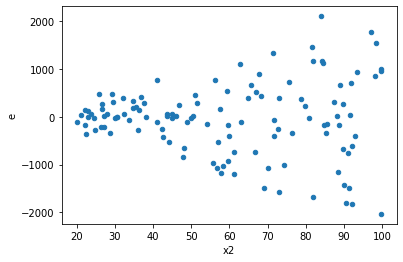

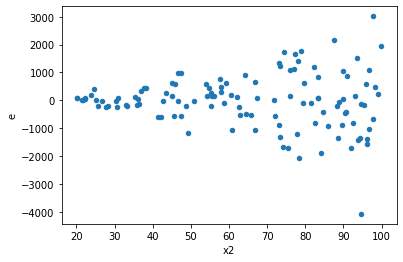

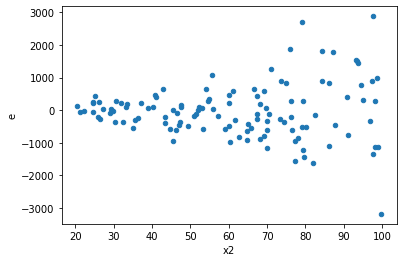

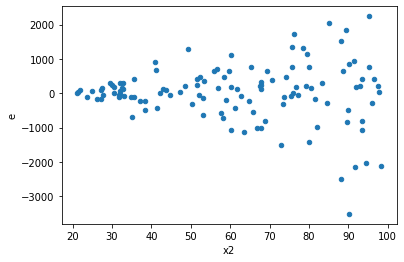

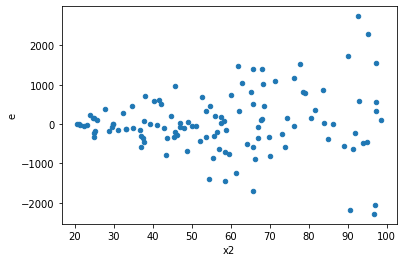

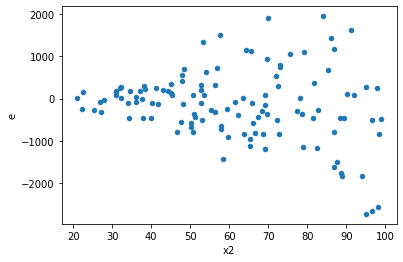

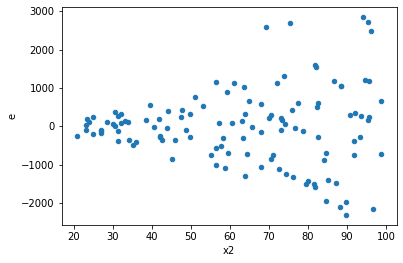

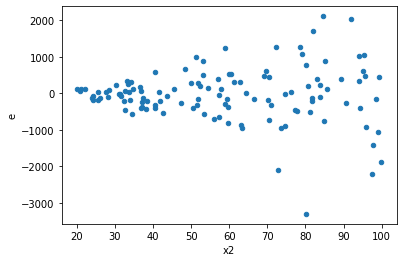

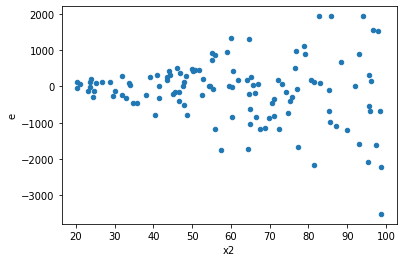

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,42586322.21105568,4000985.1341980854,967870.9593421746,90931.48032268375,10.643959120730706,6.796785356755208e-13,0.9999999999996602,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,50347213.94379567,3788099.124227725,1144254.8623589927,86093.16191426647,13.290891366011941,9.547918011776346e-15,0.9999999999999952,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,66832712.38740151,6905262.757784506,1518925.2815318524,156937.78994964788,9.678518360805173,4.0032421821933895e-12,0.9999999999979984,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,68018161.30100605,5039247.745448272,1545867.302295592,114528.35785109708,13.497681546306952,7.105427357601002e-15,0.9999999999999964,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,66324170.41709805,4924610.977068547,1507367.5094795013,111922.97675155789,13.467900454662628,7.549516567451064e-15,0.9999999999999962,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,47793650.34740387,5086688.005691273,1086219.3260773607,115606.54558389257,9.395828935041747,6.912692640526075e-12,0.9999999999965437,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,53352128.92015915,5256189.020659484,1212548.3845490718,119458.84137862464,10.150344424536158,1.6542323066914832e-12,0.9999999999991729,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,77534182.59318306,7650232.27093553,1762140.513481433,173868.91524853476,10.134879549703081,1.701971896750365e-12,0.999999999999149,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,52525413.39723314,3989936.0855215183,1193759.3953916624,90680.3655800345,13.164474886661655,1.1546319456101628e-14,0.9999999999999942,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,42586322.21105568,4000985.1341980854,967870.9593421746,90931.48032268375,10.643959120730706,6.796785356755208e-13,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,50347213.94379567,3788099.124227725,1144254.8623589927,86093.16191426647,13.290891366011941,9.547918011776346e-15,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,66832712.38740151,6905262.757784506,1518925.2815318524,156937.78994964788,9.678518360805173,4.0032421821933895e-12,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,68018161.30100605,5039247.745448272,1545867.302295592,114528.35785109708,13.497681546306952,7.105427357601002e-15,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,66324170.41709805,4924610.977068547,1507367.5094795013,111922.97675155789,13.467900454662628,7.549516567451064e-15,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,47793650.34740387,5086688.005691273,1086219.3260773607,115606.54558389257,9.395828935041747,6.912692640526075e-12,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,53352128.92015915,5256189.020659484,1212548.3845490718,119458.84137862464,10.150344424536158,1.6542323066914832e-12,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,77534182.59318306,7650232.27093553,1762140.513481433,173868.91524853476,10.134879549703081,1.701971896750365e-12,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,52525413.39723314,3989936.0855215183,1193759.3953916624,90680.3655800345,13.164474886661655,1.1546319456101628e-14,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64